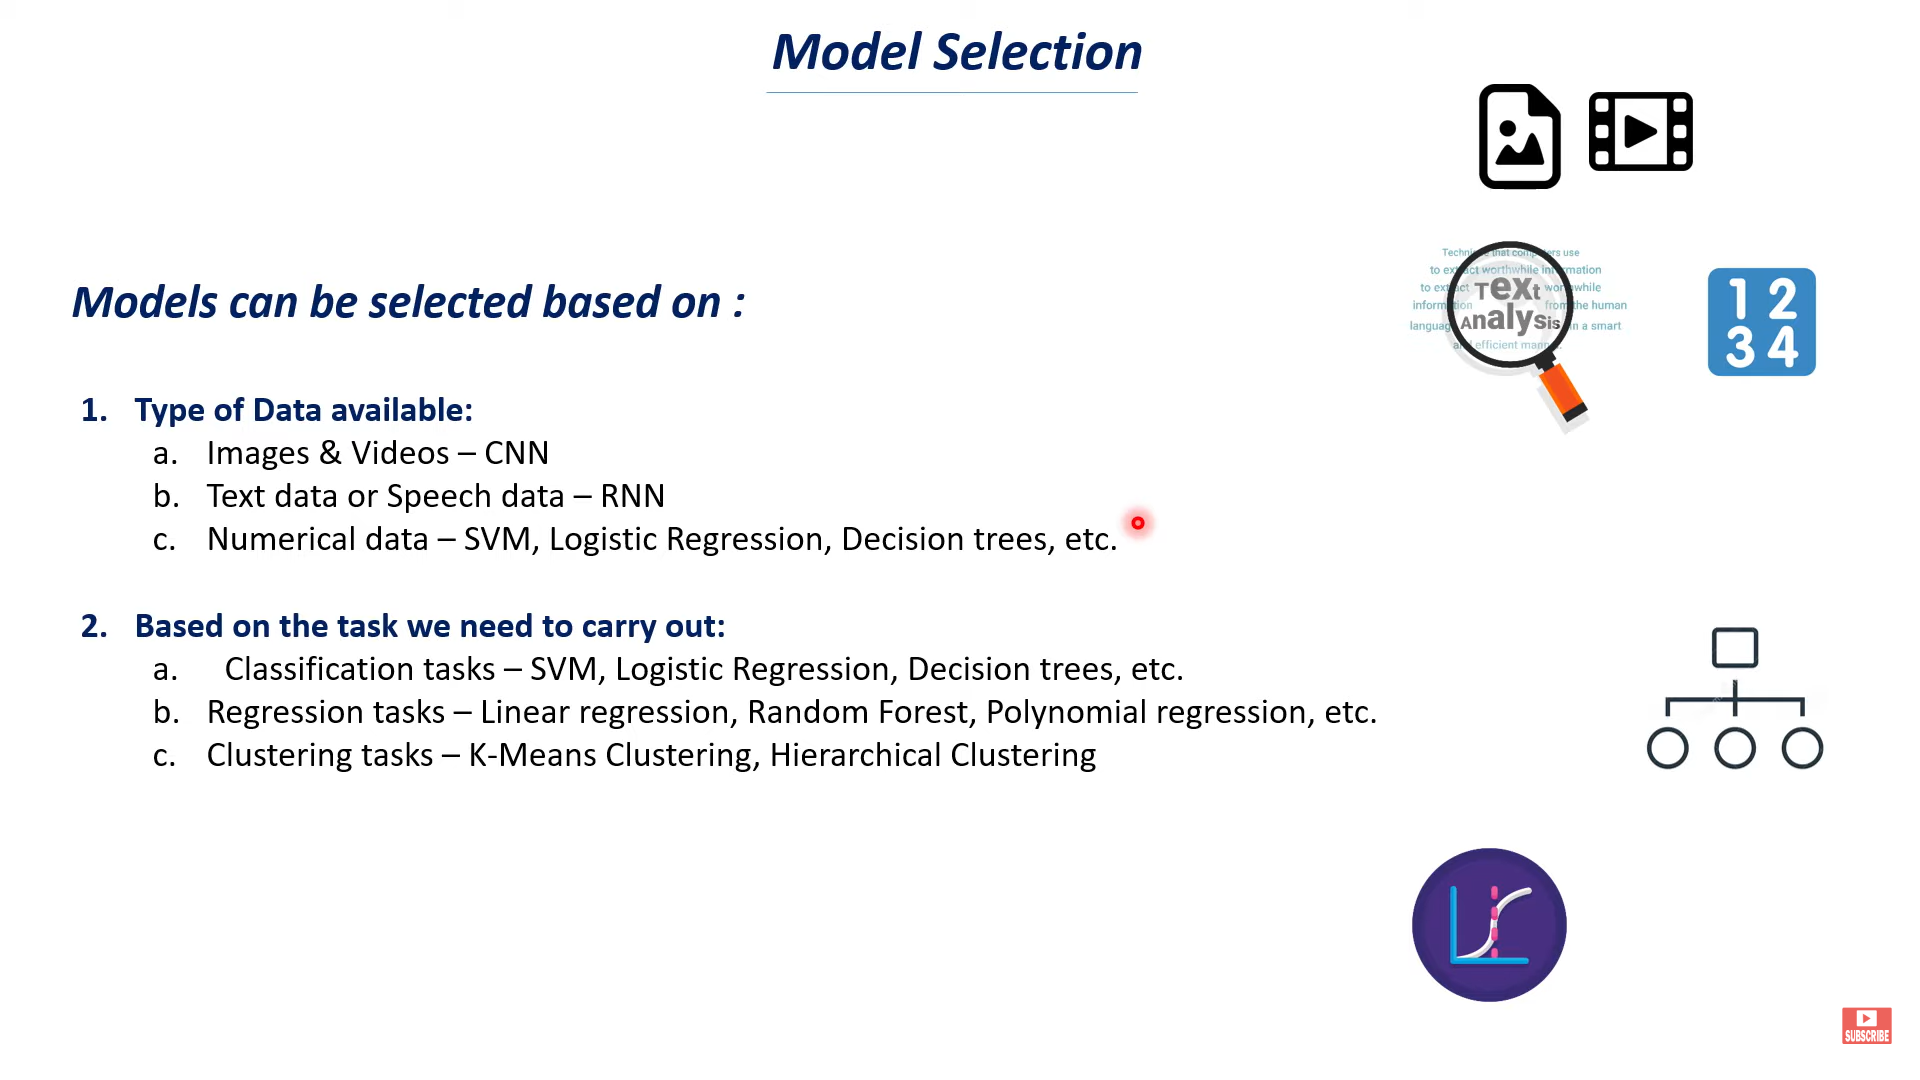

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
# importing the models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
heart_data = pd.read_csv('/content/heart (1).csv')

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_data.shape

(303, 14)

In [7]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data.info()
# to check volumn categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# checking the distribution of the target variable
heart_data['target'].value_counts()

#  1- defective
#  0 - healthy heart

1    165
0    138
Name: target, dtype: int64

In [11]:
heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [12]:
# splitting the features and targeet

X = heart_data.drop(columns='target', axis =1)
Y = heart_data['target']


In [13]:
print(X)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [14]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
type(Y)

pandas.core.series.Series

In [17]:
# for doing model selection, we need X and Y as numpy array
X = np.asarray(X)
Y = np.asarray(Y)

Model Selection

1. compare the model with default hyperparameters using cross validation

In [18]:
# list of model
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [20]:
def compare_models_cross_validation():
  for model in models:
    cv_score = cross_val_score(model,X,Y,cv=5) # cv_score will have 5 different splits similar to train_test_split
    # cross_val_score; keval split hi nhi,each splits pr training and testing bhi kr dega and each corresponding x_test pr accuracy bhi nikal lega. Everything will be done by itself
    # in each for loop iteration, you will get 5 accuracy values for that particular model

    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100 # just for getting accuracies in percentage
    mean_accuracy = round(mean_accuracy,2) # rounding off to 2 decimal points

    print('cross validation accuracies for the ',model,'=',cv_score)
    print('Accuracy score of the ',model,'=',mean_accuracy,'%')
    print('----------------------------------------------------------')


In [21]:
 compare_models_cross_validation()

cross validation accuracies for the  LogisticRegression(max_iter=1000) = [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy score of the  LogisticRegression(max_iter=1000) = 82.83 %
----------------------------------------------------------
cross validation accuracies for the  SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy score of the  SVC(kernel='linear') = 82.83 %
----------------------------------------------------------
cross validation accuracies for the  KNeighborsClassifier() = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy score of the  KNeighborsClassifier() = 64.39 %
----------------------------------------------------------
cross validation accuracies for the  RandomForestClassifier(random_state=0) = [0.85245902 0.90163934 0.81967213 0.81666667 0.8       ]
Accuracy score of the  RandomForestClassifier(random_state=0) = 83.81 %
----------------------------------------------------------


Inference: For the Heart Disease dataset, **Random Forest Classifier** has the Highest accuracy value with default hyperparameter values

Now if this much model selection is enough, continue with random forest classifier with its default hyperparameters. do train test split, train the model, and test the model, and find the accuracy by comparing the y_test_prediction ewith the y_test i.e. the actual lablels.

If you want more better model, go ahead with the below codes.

2. Doing hyperparameters tuning and model selection together based on best hyperparameter with the best accuracy

- comparing the models with different hyperparameters values using GridSearchCV

In [39]:
# list of model
models_list = [LogisticRegression(max_iter=1000),SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [23]:
# dictionary containing all the hyperparameters values for the above mentioned models
# dictionary ke andar dictionary

In [24]:
model_hyperparameters = {

         'log_reg_hyperparameters':{
            'C':[1,5,10,20]
         },

         'svc_hyperparameters':{ # svc ko two set of hyperparameters pr dekhte hain
            'kernel':['linear','poly','rbf','sigmoid'],
            'C':[1,5,10,20]
         },

         'KNN_hyperparameters':{
            'n_neighbors':[3,5,10,20]
         },

         'random_forest_hyperparameters' : {
            'n_estimators' : [10,20,50,100]
         }

}

In [25]:
type(model_hyperparameters)

dict

In [26]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters'])


In [27]:
print(model_hyperparameters.values())

dict_values([{'C': [1, 5, 10, 20]}, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, {'n_neighbors': [3, 5, 10, 20]}, {'n_estimators': [10, 20, 50, 100]}])


In [32]:
model_hyperparameters['svc_hyperparameters']

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

In [28]:
model_keys = list(model_hyperparameters.keys())

In [29]:
model_keys # we need this , in order to access the data we have

['log_reg_hyperparameters',
 'svc_hyperparameters',
 'KNN_hyperparameters',
 'random_forest_hyperparameters']

In [31]:
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [33]:
model_keys[0]

'log_reg_hyperparameters'

In [34]:
model_keys[3]

'random_forest_hyperparameters'

In [35]:
# so keys ko call krna is easy now, manulally write nhi krna padega

In [36]:
model_hyperparameters[model_keys[1]] # actual key name likhne se chutkara

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

Applying grid search cv

In [41]:
def ModelSelection(list_of_models,hyperparameters_dictionary):

  result = [] # it is like vector of C++ , v.push_back() ka kam python me list hi kr deta hai
  # result me dictionary will be appended by us

  i=0

  for model in list_of_models :
    key = model_keys[i] # model_keys is external list
    params = hyperparameters_dictionary[key]
    i+=1 # increasing i so that respective model ki corresponding keys ke sath hi hyperparameter tuning ho. Different model ke hyperparameter ke sath tuning na ho
    print(model)
    print(params)

    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,Y) # x,y are features and labels in numpy array formate

    #result is just for seeing how the training process is going on and store the each iteration result of for loop
    # ek iteration me ek pura model complete ho ja rha hai
    # total for loop run 4 times, i.e. number of models

    # hr bar ek dictionary result me append ho ja rhi hai
    result.append({
        'model used':model,
        'highest score': classifier.best_score_,
        'best hyperparameters':classifier.best_params_
    })

  # result list of dictioanries ko pandas dataframe me badl dete hai.
  result_dataframe = pd.DataFrame(result, columns=['model used','highest score','best hyperparameters'])
  return result_dataframe

In [40]:
ModelSelection(models_list,model_hyperparameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10, 20]}
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=1000),0.834863,{'C': 5}
1,SVC(),0.828306,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.643880,{'n_neighbors': 5}
3,RandomForestClassifier(random_state=0),0.838087,{'n_estimators': 100}


Random Forest Classifier with n_estimators = 100 has the highest accuracy

Hence is random forest classifier with n_estimator = 100 ke sath move ahead, train your model, and do predictions. find accuracy scores and all.